In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/g/data/tm70/ml0072/COMMON/git_repos/esmf-trace/src")
sys.path.append("/g/data/tm70/ml0072/COMMON/git_repos/sandbox/scalings")
import parallel_runs

In [3]:
import json
from pathlib import Path
import os
import shlex
import subprocess
from concurrent.futures import ProcessPoolExecutor, as_completed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psutil
print(psutil.cpu_count(logical=False))
max_workers = psutil.cpu_count(logical=False)

28


In [4]:
import bt2

In [12]:
main_script = "/g/data/tm70/ml0072/COMMON/git_repos/esmf-trace/src/access/esmf_trace/main.py"
runs_base_path = Path("/g/data/tm70/ml0072/COMMON/git_repos/access-experiment-generator/performance_runnings_ncmas/om3")
runs_prefix_name = "compiler_flag_"
runs_n = 3
branch_name = "mom6-cice6-compiler_flags_25km_ryf"
post_base_path = Path("/g/data/tm70/ml0072/COMMON/git_repos/access-experiment-generator/performance_runnings_ncmas/om3/postprocessing")
pets = "0,291"
model_component = [
    # "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1",
    "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1",
    "[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1",
]
# output_index = "1,2"
output_index = None
save_mode = "both"
stats_start_index = 2
stats_end_index = -1

In [28]:
parallel_runs.main(post_base_path, runs_n, runs_prefix_name, runs_base_path, branch_name, output_index, pets, stats_start_index, stats_end_index, model_component, save_mode, main_script, max_workers)

-- skip existing: /g/data/tm70/ml0072/COMMON/git_repos/access-experiment-generator/performance_runnings_ncmas/om3/postprocessing/postprocessing_compiler_flag_1/output000
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kernel: /g/data/xp65/public/apps/med_conda/envs/analysis3-25.09/bin/python
kerne

In [19]:
! cd /g/data/tm70/ml0072/COMMON/git_repos/access-experiment-generator/performance_runnings_ncmas/om3/postprocessing/postprocessing_compiler_flag_1/output002/logs && vi err.log

7="err.log" 0L, 0C~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                   

In [7]:
import postprocessing

In [8]:
json_paths = postprocessing.collect_timeseries_jsons(
    post_base_path,
    runs_prefix_name=runs_prefix_name,
    # output_index="1,2"
)

dd = postprocessing.make_timeseries_df(
    json_paths = json_paths,
    component = model_component,
    stats_start_index = 2,
    stats_end_index = -1,
    combine_outputs = False,
)
dd["model_component"].unique()

array(['[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1',
       '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1'],
      dtype=object)

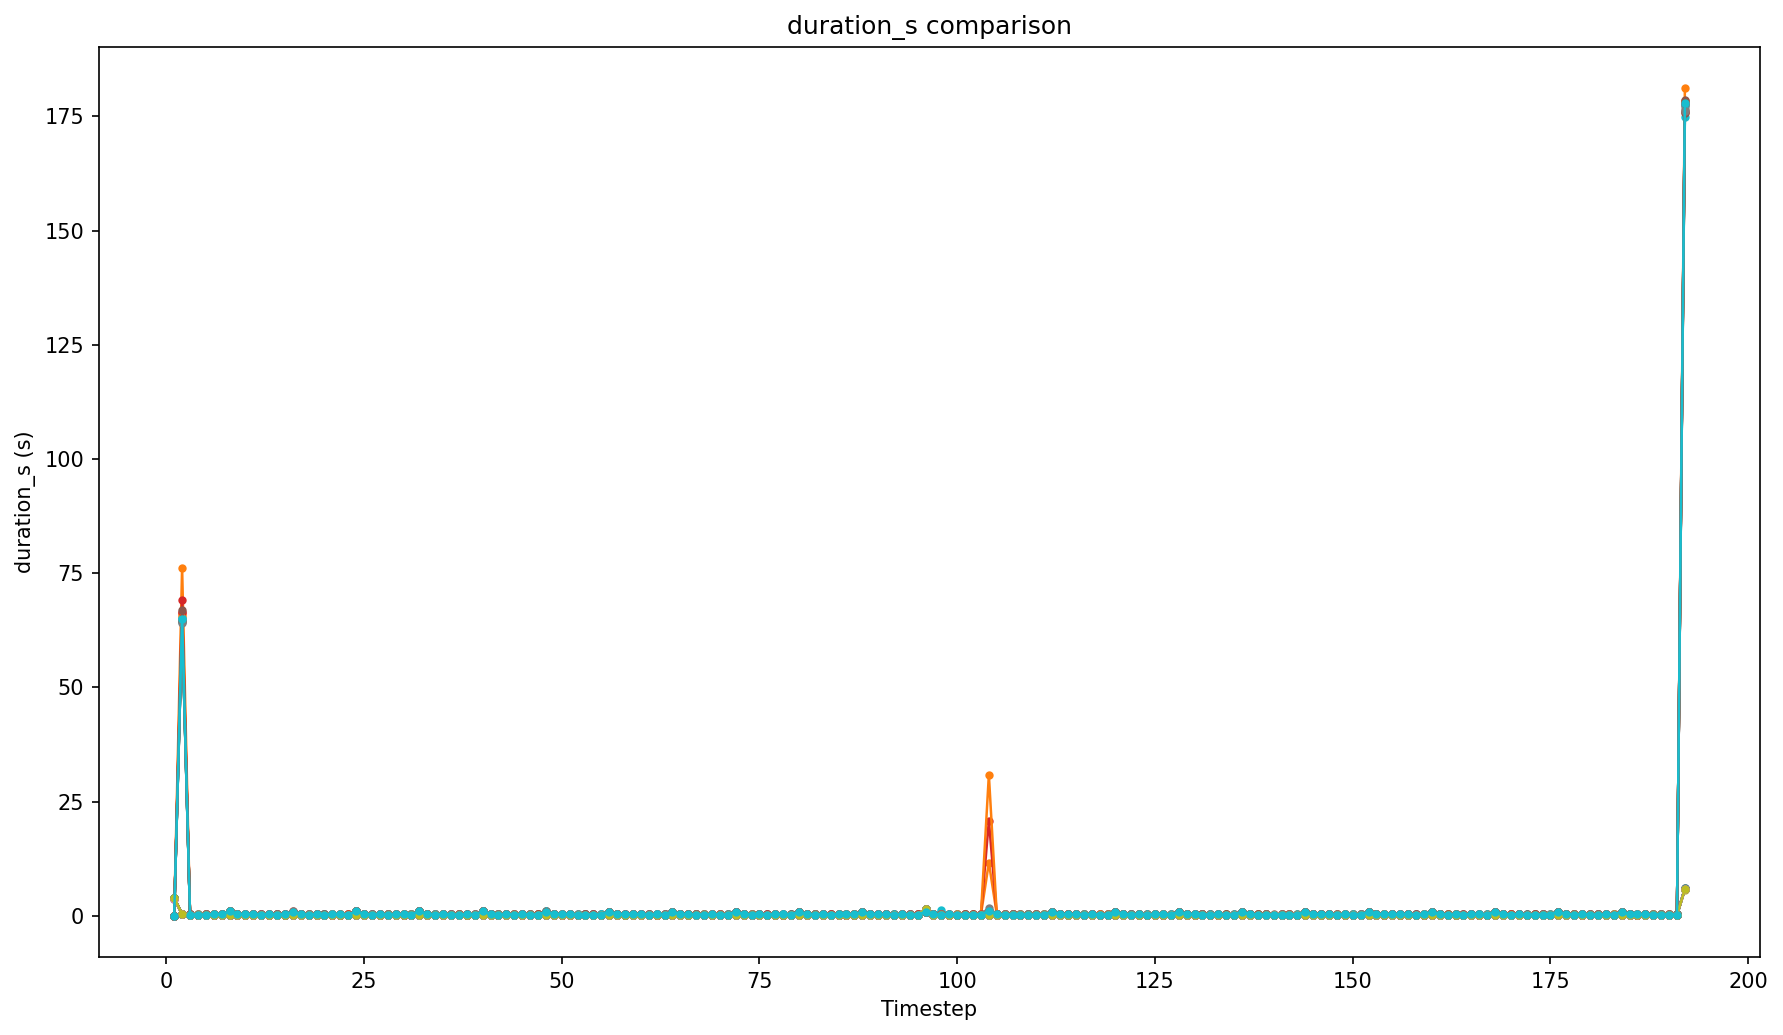

,start,model_component,pet,duration_s,__case_name,__output_name,__output_index,__src_path,__order,__case_order,time_index,__combined
176,1759404285684093737,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,3.829365,compiler_flag_1,output000,0,/g/data/tm70/ml0072/COMMON/git_repos/access-ex...,0,0,1,False
177,1759404289582267547,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,0.362867,compiler_flag_1,output000,0,/g/data/tm70/ml0072/COMMON/git_repos/access-ex...,0,0,2,False
178,1759404355048928536,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,0.173863,compiler_flag_1,output000,0,/g/data/tm70/ml0072/COMMON/git_repos/access-ex...,0,0,3,False
179,1759404355336497055,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,0.133649,compiler_flag_1,output000,0,/g/data/tm70/ml0072/COMMON/git_repos/access-ex...,0,0,4,False
180,1759404355610009815,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,0.137118,compiler_flag_1,output000,0,/g/data/tm70/ml0072/COMMON/git_repos/access-ex...,0,0,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5572,1759407696441444774,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,0.261551,compiler_flag_3,output004,4,/g/data/tm70/ml0072/COMMON/git_repos/access-ex...,14,10,188,False
5571,1759407696715821252,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,0.258325,compiler_flag_3,output004,4,/g/data/tm70/ml0072/COMMON/git_repos/access-ex...,14,10,189,False
5570,1759407696986485222,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,0.261294,compiler_flag_3,output004,4,/g/data/tm70/ml0072/COMMON/git_repos/access-ex...,14,10,190,False
5569,1759407697261029211,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,0.258240,compiler_flag_3,output004,4,/g/data/tm70/ml0072/COMMON/git_repos/access-ex...,14,10,191,False


In [25]:
postprocessing.plot_timeseries(
    df=dd,
    legend=False
)

In [16]:
dd_combine = postprocessing.make_timeseries_df(
    json_paths = json_paths,
    component = model_component,
    stats_start_index = 2,
    stats_end_index = -1,
    combine_outputs = True,
)
dd_combine

,__case_name,model_component,pet,time_index,duration_s,__case_order,__combined
0,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,3,0.181963,0,True
1,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,3,0.268728,0,True
2,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,4,0.137290,0,True
3,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,4,0.263368,0,True
4,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,5,0.134835,0,True
...,...,...,...,...,...,...,...
1129,compiler_flag_3,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,189,0.263092,10,True
1130,compiler_flag_3,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,190,0.139991,10,True
1131,compiler_flag_3,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,190,0.261348,10,True
1132,compiler_flag_3,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,191,0.149627,10,True


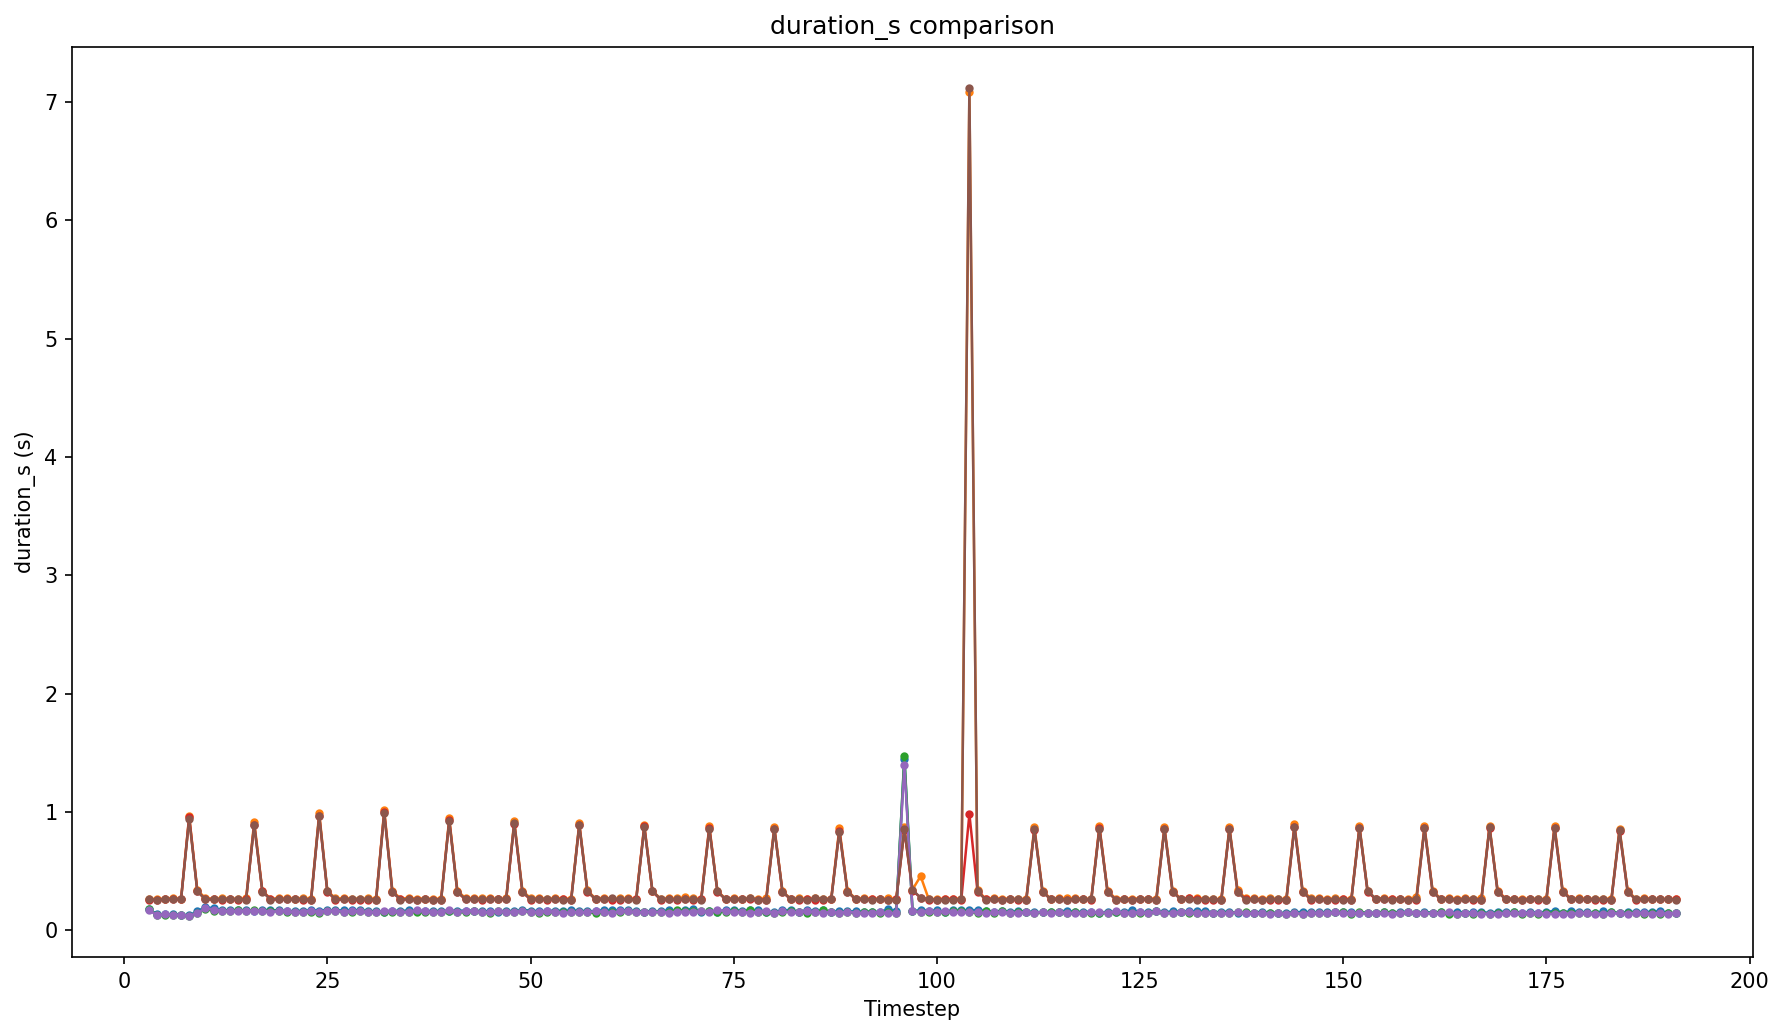

,__case_name,model_component,pet,time_index,duration_s,__case_order,__combined
0,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,3,0.181963,0,True
1,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,3,0.268728,0,True
2,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,4,0.137290,0,True
3,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,4,0.263368,0,True
4,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,5,0.134835,0,True
...,...,...,...,...,...,...,...
1129,compiler_flag_3,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,189,0.263092,10,True
1130,compiler_flag_3,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,190,0.139991,10,True
1131,compiler_flag_3,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,291,190,0.261348,10,True
1132,compiler_flag_3,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0,191,0.149627,10,True


In [17]:
postprocessing.plot_timeseries(
    df=dd_combine,
    legend=False,
)

In [32]:
dd_stats = postprocessing.stats_by_component_over(
    dd,
    model_component=["[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1"],
    level="case_output",
)
dd_stats

,__case_name,__output_name,model_component,mean_s,max_s,min_s,std_s,p50_s,n_pets,count_per_pet,total_s_per_pet,stats_start_index,stats_end_index,iqr_s,coff_var,max_over_mean,se_mean,ci95_low,ci95_high,__case_order
0,compiler_flag_1,output000,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.410563,11.625671,0.258675,0.844650,0.269649,1,189.0,77.596468,None,None,0.019175,2.057295,28.316389,0.061439,0.290142,0.530984,0
1,compiler_flag_1,output001,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.457071,20.816762,0.251298,1.502589,0.267166,1,189.0,86.386473,None,None,0.019039,3.287427,45.543797,0.109297,0.242849,0.671294,0
2,compiler_flag_1,output002,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.357456,1.095575,0.249172,0.208911,0.273055,1,189.0,67.559142,None,None,0.019753,0.584438,3.064925,0.015196,0.327672,0.387240,0
3,compiler_flag_1,output003,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.353824,1.012867,0.249433,0.206854,0.269408,1,189.0,66.872821,None,None,0.042128,0.584623,2.862626,0.015046,0.324333,0.383315,0
4,compiler_flag_1,output004,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.357472,1.173786,0.257159,0.213515,0.269712,1,189.0,67.562138,None,None,0.021909,0.597293,3.283578,0.015531,0.327031,0.387912,0
5,compiler_flag_2,output000,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.345411,1.054811,0.248776,0.205638,0.261684,1,189.0,65.282604,None,None,0.015226,0.595344,3.053789,0.014958,0.316093,0.374728,5
6,compiler_flag_2,output001,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.345357,1.001716,0.250891,0.203315,0.263004,1,189.0,65.272442,None,None,0.016242,0.588711,2.900524,0.014789,0.316370,0.374343,5
7,compiler_flag_2,output002,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.346651,0.985093,0.249955,0.203279,0.264588,1,189.0,65.517054,None,None,0.020623,0.586408,2.841741,0.014786,0.317670,0.375632,5
8,compiler_flag_2,output003,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.344549,0.997675,0.248650,0.203078,0.262228,1,189.0,65.119844,None,None,0.012013,0.589403,2.895593,0.014772,0.315597,0.373502,5
9,compiler_flag_2,output004,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.345153,1.108571,0.243581,0.205582,0.262230,1,189.0,65.233912,None,None,0.014628,0.595627,3.211825,0.014954,0.315843,0.374463,5


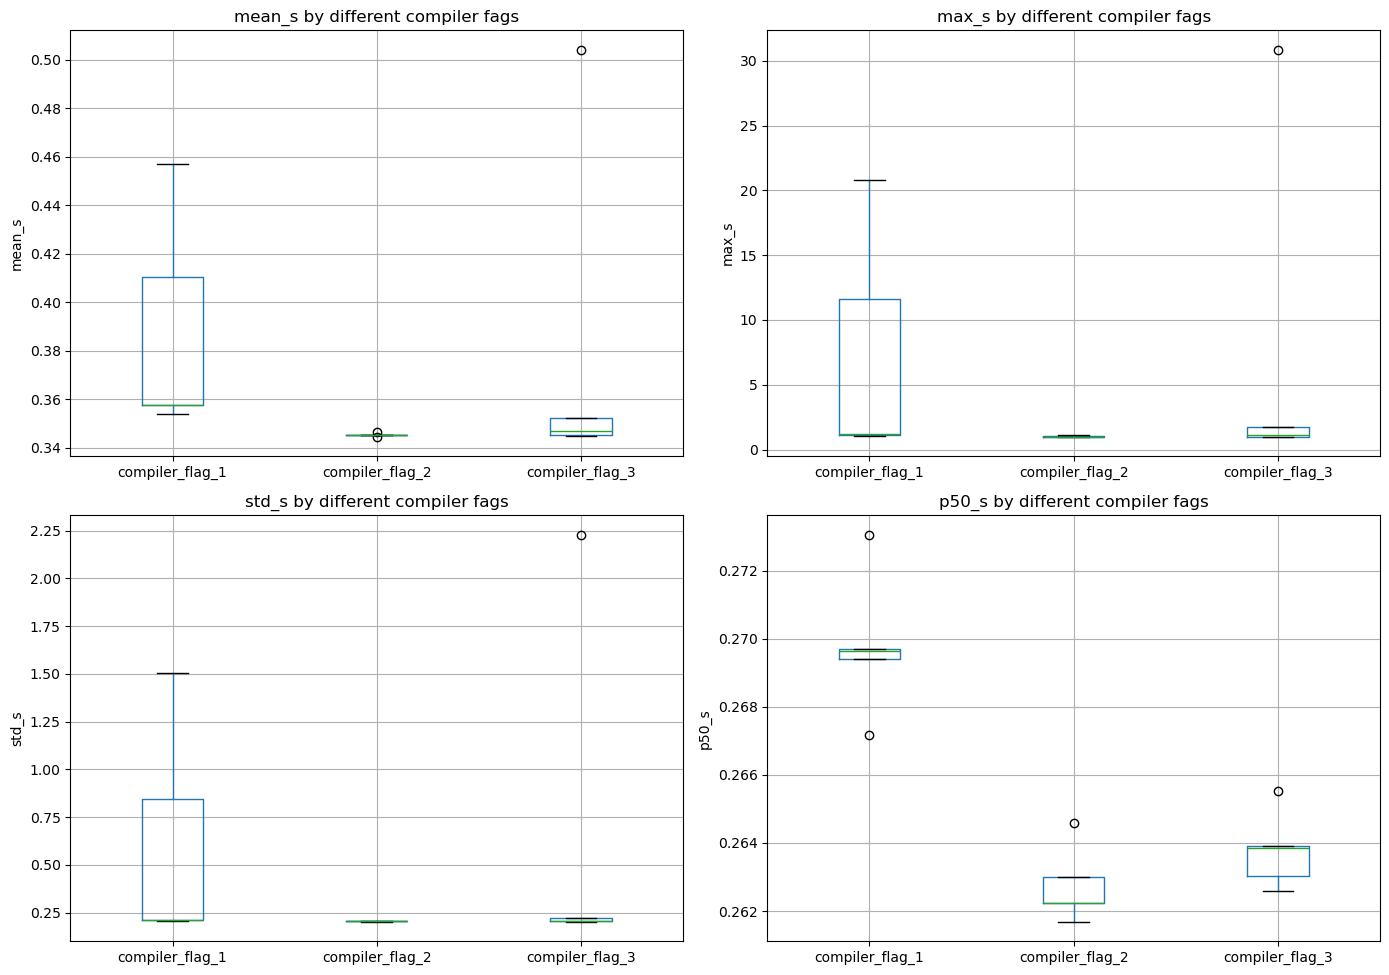

In [41]:
metrics = ["mean_s", "max_s", "std_s", "p50_s"]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes = axes.flatten()

for ax, metric in zip(axes, metrics):
    dd_stats.boxplot(column=metric, by="__case_name", ax=ax, patch_artist=False)
    ax.set_title(f"{metric} by different compiler fags")
    ax.set_xlabel("")
    ax.set_ylabel(metric)
    ax.tick_params(axis='x')#, rotation=45)

plt.suptitle("")

plt.tight_layout()
plt.show()

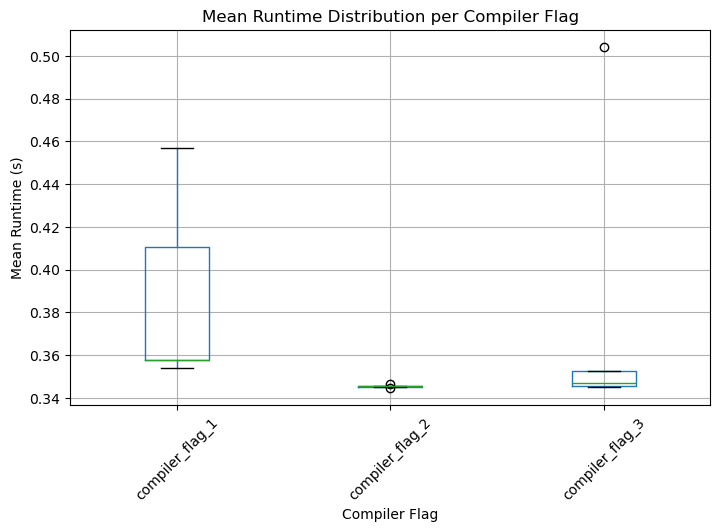

In [43]:
dd_stats.boxplot(column="mean_s", by="__case_name", figsize=(8,5))
plt.title("mean runtime distribution per compiler flag")
plt.suptitle("")
plt.xlabel("Compiler Flag")
plt.ylabel("Mean Runtime (s)")
plt.xticks(rotation=45)
plt.show()

In [20]:
dd_combine_stats = postprocessing.stats_by_component_over(
    dd_combine,
    model_component=["[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1"],
    level="case",
)
dd_combine_stats

,__case_name,model_component,mean_s,max_s,min_s,std_s,p50_s,n_pets,count_per_pet,total_s_per_pet,stats_start_index,stats_end_index,iqr_s,coff_var,max_over_mean,se_mean,ci95_low,ci95_high,__case_order
0,compiler_flag_1,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.387277,7.080359,0.261986,0.529483,0.269660,1,189.0,73.195408,None,None,0.013587,1.367195,18.282403,0.038514,0.311789,0.462765,0
1,compiler_flag_2,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.345424,0.997187,0.255051,0.204020,0.262170,1,189.0,65.285171,None,None,0.009578,0.590637,2.886848,0.014840,0.316337,0.374511,5
2,compiler_flag_3,[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase...,0.378744,7.118354,0.255069,0.531101,0.263735,1,189.0,71.582548,None,None,0.010462,1.402269,18.794648,0.038632,0.303025,0.454462,10


In [23]:
dd_combine_stats["model_component"].tolist()

['[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1',
 '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1',
 '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1']